In [2]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3
print('xxx')

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
pjr3.py complete
xxx


See really good discussion of spectral element grids at https://acme-climate.atlassian.net/wiki/spaces/DOC/pages/34113147/SE+Atmosphere+Grid+Overview+EAM+CAM

In [3]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [4]:
findNiceContours?

Signature: findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
Docstring:
Find Nice Contours
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
nlevs = approximate number of contour levels to return (default 10)
rmClev = if defined delete the contour level near this value
sym = if defined make the contour intervals symmetric about zero
verbose = if defined, print out some info to help debug
File:      ~/Python/pjr3.py
Type:      function


In [5]:
plotZMf?

Signature:
plotZMf(
    data,
    x,
    y,
    plotOpt=None,
    modelLevels=None,
    surfacePressure=None,
    axesa=None,
    fig=None,
)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the to

In [6]:
from nco import Nco

In [7]:
from matplotlib import pyplot
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection, PolyCollection
from cartopy import crs
import numpy
import xarray


def plot_unstructured(xv, yv, data, antialiased=False, **kwargs):
    """
    Plot unstructured data. xv and yv specify the x and y coordinates
    of the vertices of each cell and should have shape [ni,nv] where ni
    is the size of the grid (number of cells) and nv is the number of
    vertices for each cell. Data contains the values of the data you
    want to plot, and should have dimension [ni,]. The intent with this
    function is that you will need to read in an auxillary SCRIP-format
    file that describes the grid (unless this information is present in
    the same file that contains the data; unlikely) as well as the file
    that contains the data, and grab the cell corner information from
    the SCRIP file and the data from the data file. This function will
    then plot the data on the native grid by looping over each cell and
    drawing patches for each. Note that this will probably be really
    slow for big grids! Seems to work alright up to about ne120 or so,
    but really some more clever techniques should probably be used here
    (parallelism?).
    
    NOTE: To avoid artifacts due to antialiasing, you should probably pass
    antialiaseds=False to **kwargs.
    """

# Create array of cell vertices, indexed [npoints, ncorners, 2]
    corners = numpy.stack([xv, yv], axis=2)

    # Go back and fix corners where they wrap; we shouldn't have to do
    # this with cartopy, but it seems we do...
    for i in range(corners.shape[0]):
        if any(corners[i,:,0] < -90) and any(corners[i,:,0] > 90):
            corners[i,:,0] = numpy.where(corners[i,:,0] < -90, corners[i,:,0] + 360, corners[i,:,0])
        if any(corners[i,:,1] < -45) and any(corners[i,:,1] > 45):
            corners[i,:,1] = numpy.where(corners[i,:,1] < -45, corners[i,:,1] + 90, corners[i,:,1])

    # Create a PatchCollection from our aggregated list of PathPatches
    p = PolyCollection(corners, array=data, antialiaseds=antialiased, **kwargs)
#    colors = 100*np.random.rand(len(data))
#    p.set_array(np.array(colors))

    # Add the collection to the axes
    ax = pyplot.gca()
    ax.add_collection(p)

    # Set sane axes limits
    ax.set_xlim([xv.min(), xv.max()])
    ax.set_ylim([yv.min(), yv.max()])

    # Return collection of patches
    return p


# Function to convert longitude from 0-360 to -180 to 180
def fix_lon(lon):
    return numpy.where(lon > 180, lon - 360, lon)



sooty.pnl.gov
/lustre/d3x345/Misc_E3SM/theta.20180906.branch_noCNT.A_WCYCL1950S_CMIP6_HR.ne120_oRRS18v3_ICG.cam.h0.0045-12.nc
xxx m2/s2 55079.28
clev1 float64 [   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000.]
clev2 float64 [2000. 2500. 3000. 3500. 4000. 4500. 5000.]
California
Nevada


<Figure size 3900x1860 with 0 Axes>

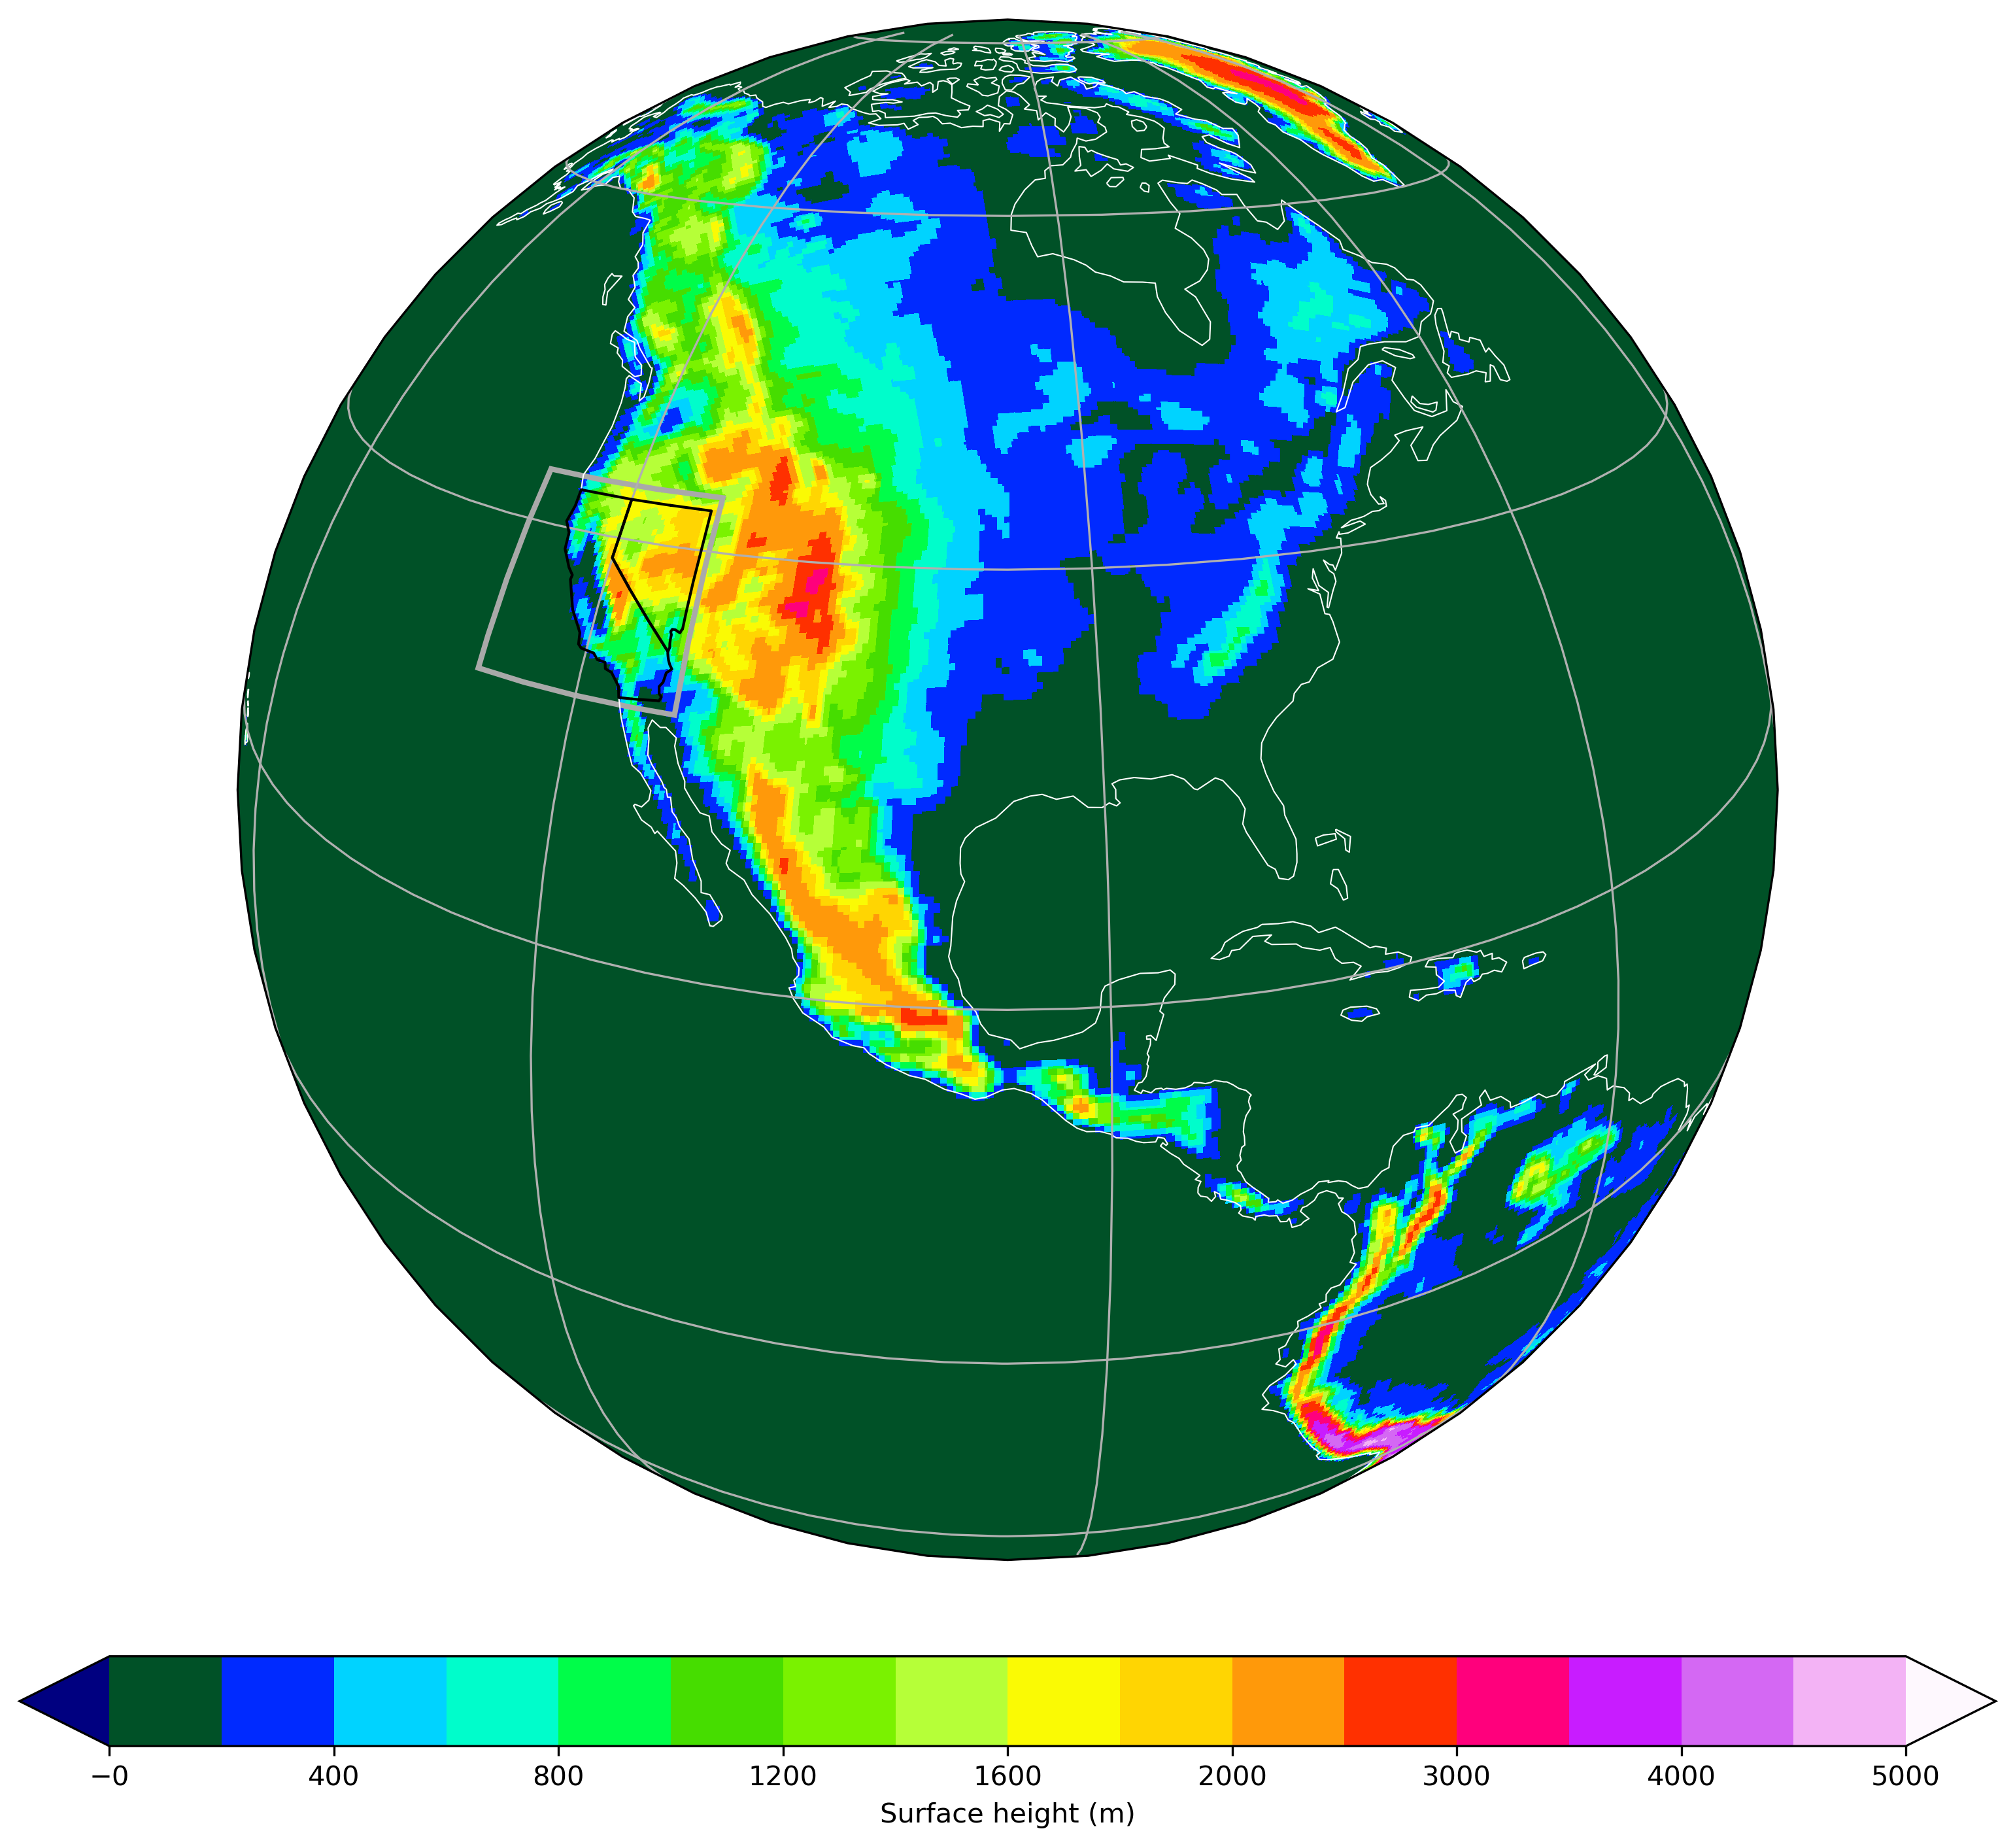

plotfile testsat.pdf


In [22]:
import os
import platform
import cmocean
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader

host = platform.node()
print(host)

resolution = 'high'

if ('cori' in host):
    if (resolution == 'low'):
        indir = '/global/cfs/cdirs/e3sm/wlin/E3SM_simulations/DECKv1/20180215.DECKv1b_H1.ne30_oEC.edison/archive/atm/hist/20180215.DECKv1b_H1.ne30_oEC.edison.cam.h0.2014-12.nc'
    else:
        indir = '/global/cfs/cdirs/e3smpub/E3SM_simulations/theta.20180906.branch_noCNT.A_WCYCL1950S_CMIP6_HR.ne120_oRRS18v3_ICG/run-0006-01-01-180907--0046-01-01-190111/theta.20180906.branch_noCNT.A_WCYCL1950S_CMIP6_HR.ne120_oRRS18v3_ICG.cam.h0.0045-12.nc'
elif ('sooty' in host):
    if (resolution == 'low'):
        indir = '/lustre/d3x345/Misc_E3SM/20180215.DECKv1b_H1.ne30_oEC.edison.cam.h0.2014-12.nc'
    else:
        indir = '/lustre/d3x345/Misc_E3SM/theta.20180906.branch_noCNT.A_WCYCL1950S_CMIP6_HR.ne120_oRRS18v3_ICG.cam.h0.0045-12.nc'
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})
#print(DS)
weights = DS.area
weights.name = 'weights'
#print(weights)
#print(weights.sum(),4.*pi)
#Var = DS.FSNT.isel(time=0)
varname = 'PHIS'
#varname = 'LANDFRAC'
Var = DS[varname]
print('xxx',Var.attrs['units'],Var.values.max())

if(varname == 'PHIS'):
    Var = Var/9.8
    Var.attrs['units'] = 'm'
    Var.attrs['long_name'] = 'Surface height'


if ('cori' in host):
    if (resolution == 'low'):
        gridfile = '/global/cfs/cdirs/e3sm/mapping/grids/ne30np4_pentagons.091226.nc'
    else:
        gridfile = '/global/cfs/cdirs/e3sm/mapping/grids/ne120np4_pentagons.20190611.nc'
elif ('sooty' in host):
    if (resolution == 'low'):
        gridfile = '/lustre/d3x345/Misc_E3SM/ne30np4_pentagons.091226.nc'
    else:
        gridfile = '/lustre/d3x345/Misc_E3SM/ne120np4_pentagons.20190611.nc'
else:
    1./0.

ds_grid = xr.open_dataset(gridfile).rename({'grid_size': 'ncol'})
lon_edges = ds_grid['grid_corner_lon']
lat_edges = ds_grid['grid_corner_lat']
data = Var.squeeze()
#print('data',data)

ds_grid = xarray.open_dataset(gridfile).rename({'grid_size': 'ncol'})
lon_edges = ds_grid['grid_corner_lon']
lat_edges = ds_grid['grid_corner_lat']

#print('lon_edges',lon_edges)
varname = data.name
# Reduce data if we need to
if 'time' in data.dims: data = data.isel(time=0).squeeze()
if 'lev' in data.dims: data = data.isel(lev=-1).squeeze()
    
#xxx

dpi=2400
dpi=300
plt.figure(figsize=(13,6.2),dpi=dpi)

#map_proj = ccrs.Orthographic(central_latitude=-45.0, central_longitude=-45.0)
map_proj = ccrs.NearsidePerspective(central_longitude=-65.0, central_latitude=-30.0, satellite_height=3.5785831e7*0.3)
map_proj = ccrs.NearsidePerspective(central_longitude=-95.0, central_latitude=+30.0, satellite_height=3.5785831e7*0.2)
#map_proj = ccrs.Mollweide()
#map_proj = ccrs.PlateCarree()

if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually




# Make plot
figure, ax = pyplot.subplots(
    1, 1,figsize=(13,13),dpi=dpi,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
    subplot_kw=dict(projection=map_proj)
)
dd = data.values
clevs = findNiceContours(np.array([0.,5600.]),20)
#clevs = findNiceContours(dd,nlevs=20)
cmap = plt.cm.Blues
cmap = mpl.cm.viridis
cmap = mpl.cm.gist_ncar

clev1 = findNiceContours(np.array([0.,2000.],dtype=np.float64),10)
print('clev1',clev1.dtype,clev1)
clev2 = findNiceContours(np.array([2001.,5000.],dtype=np.float64),10)
print('clev2',clev2.dtype,clev2)
clevs = np.append(clev1,clev2[1:])
#clevs = findNiceContours(dd,nlevs=20)
clevs[0] = -0.1

#cmap = cmocean.cm.topo

bounds = clevs
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)


pl = plot_unstructured(
    fix_lon(lon_edges.values), lat_edges.values, dd,
    transform=crs.PlateCarree(), ec='face',norm=norm,cmap=cmap,linewidths=0.1 #,ec='red',alpha=0.1
    #transform=crs.Geodetic(), ec='face',norm=norm,cmap=cmap,linewidths=0.1 #,ec='red',alpha=0.1

)
#pl1 = plot_unstructured(
#    fix_lon(lon_edges.values), lat_edges.values, data=None,
#    transform=crs.PlateCarree(),ec='red',alpha=0.1
#)
ax.set_global()
#ax.set_extent([-180, -100, 0, 80], crs=ccrs.PlateCarree())
#ax.set_extent([-120, -100, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines(color='white', linewidth=0.5)
#xxx
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)
gl.n_steps = 90
gl.n_steps = 3
#
#ax.gridlines()
#
#xxx
# Add colorbar to plot
#cb = pyplot.colorbar(
#    pl, orientation='horizontal',
#    label='%s (%s)'%(data.long_name, data.units), pad=0.05
#)

slat = 32.2
nlat = 42.7
elon =-113.5
wlon = -127.5
#aaa -127.51396 -113.48604
#bbb 32.219883 42.65326
lat_corners = np.array([slat,  slat, nlat, nlat])
lon_corners = np.array([ wlon, elon, elon, wlon]) + 0.01 # offset from gridline for clarity

poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners

#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0))
#poly = mpatches.Polygon(poly_corners, closed=True, ec='cyan', fill=True, lw=1, fc="none", transform=ccrs.Geodetic(),alpha=0.4)
poly = mpatches.Polygon(poly_corners, closed=True, ec='darkgrey', fill=True, lw=2, fc="none", transform=ccrs.PlateCarree(),alpha=1.)

ax.add_patch(poly)

#clat = -20.
#clon = -75.
#slat = clat-0.5
#nlat = clat+0.5
#wlon = clon-0.5
#elon = clon+0.5

#lat2_corners = np.array([slat,  slat, nlat, nlat])
#lon2_corners = np.array([ wlon, elon, elon, wlon]) + 0.1 # offset from gridline for clarity

#poly2_corners = np.zeros((len(lat2_corners), 2), np.float64)
#poly2_corners[:,0] = lon2_corners
#poly2_corners[:,1] = lat2_corners

#poly = mpatches.Polygon(poly2_corners, closed=True, ec='orange', fill=True, lw=2, fc="none", transform=ccrs.PlateCarree(),alpha=1.)

#ax.add_patch(poly)



shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

#ax.set_title('State Population Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'
    facecolor = 'none'
    
    if (astate.attributes['name']=='California') or (astate.attributes['name']=='Nevada') :
        ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor, zorder=4)
        print( astate.attributes['name'])

cb = figure.colorbar(
    cmap2,
    orientation='horizontal',
    label='%s (%s)'%(data.long_name, data.units), pad=0.05
)

if False: '''
# Add markers to plot for GLL centers
pl = ax.plot(
    fix_lon(ds_grid['grid_center_lon'].values),
    ds_grid['grid_center_lat'].values,
    marker=',', markersize=0.5,
    MarkerFaceColor='black', MarkerEdgeColor='black',
    linestyle='none',
)
'''
plt.show()
# Save plot
# this plot doesn't look great as a PDF file. You can currently see the edges of the polycollection regions
plotfile = '%s_example.pdf'%varname
plotfile = 'testsat.pdf'
figure.savefig(plotfile, bbox_inches='tight',dpi=dpi)
print('plotfile',plotfile)

Minnesota
Montana
North Dakota
Hawaii
Idaho
Washington
Arizona
California
Colorado
Nevada
New Mexico
Oregon
Utah
Wyoming
Arkansas
Iowa
Kansas
Missouri
Nebraska
Oklahoma
South Dakota
Louisiana
Texas
Connecticut
Massachusetts
New Hampshire
Rhode Island
Vermont
Alabama
Florida
Georgia
Mississippi
South Carolina
Illinois
Indiana
Kentucky
North Carolina
Ohio
Tennessee
Virginia
Wisconsin
West Virginia
Delaware
District of Columbia
Maryland
New Jersey
New York
Pennsylvania
Maine
Michigan
Alaska


/home/d3x345/Python/pjr3.py:14: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  from scipy.interpolate import interp1d
/home/d3x345/Python/pjr3.py:15: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  from mpl_toolkits.axes_grid1 import make_axes_locatable


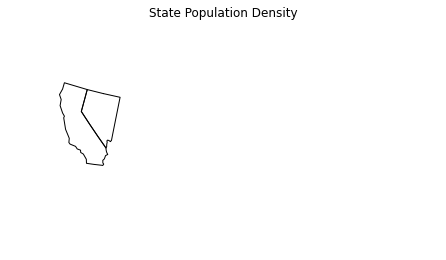

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Population Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'
    facecolor = 'none'
    
    print( astate.attributes['name'])
    
    if (astate.attributes['name']=='California') or (astate.attributes['name']=='Nevada') :
        ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

plt.show()

In [ ]:
# next three cells run a script developed at https://www.uesleisutil.com.br/etopo1-plotting-etopo1-w-xarray-cartopy-using-jupyter-nb.html
from scipy.ndimage.filters import gaussian_filter
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cmocean
import matplotlib.patches as mpatches


In [ ]:
import os
import platform
host = platform.node()
print(host)
indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
print(indir)

# Open ETOPO1 file and slice desired area.
#etopo = xr.open_dataset('~/NetCDF_Files/etopo1.nc')
etopo = xr.open_dataset('~/NetCDF_Files/ETOPO1_Ice_g_gmt4_grd.nc')

# Slice desired coordinates.
etopo = etopo.sel(x=slice(-53,-44), y=slice(-31,-23))  

# Load sliced variables.
lat = etopo.y
lon = etopo.x
topo = etopo.z

In [ ]:
# Create figure.
fig  = plt.figure(1,figsize=(10,8),facecolor='w')  

# Use Cartopy projection.
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Cartopy coastines.
ax.coastlines()

# Add gridlines into the figure. We disabled interior gridline but kept 
# the labels.
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, 
color='black',alpha=0.0, linestyle='--')

# Disable top and right grid line labels.
gl.top_labels = gl.right_labels = False

# Add 1000 and 200 meters bathymetry lines and labels.
# We will apply a Gaussian filter to smooth the data. 
bathy_levels = [-1000,-200]  

Ct = ax.contour(gaussian_filter(lon,2),gaussian_filter(lat,2)
,gaussian_filter(topo,2),bathy_levels,colors='black',latlon=True,
linewidths=0.7,linestyles='solid')

manual_locations = [(-48.2,-31),(-49,-30.5)] 

clbls = plt.clabel(Ct,fmt='%i', fontsize=9,manual=manual_locations,
colors="black")

# Add 300 and 500 meters topography line and labels.
# In this case we want to highlight topography over the east side of 
# Santa Catarina State. We will apply a Gaussian filter to smooth data. 
etopo1 = etopo.sel(x=slice(-50.2,-48), y=slice(-29,-25))   
lat1 = etopo1.y
lon1 = etopo1.x
topo1 = etopo1.z
topo_levels = [300,500] 

Ct2 = ax.contour(gaussian_filter(lon1,2),gaussian_filter(lat1,2),
gaussian_filter(topo1,2),topo_levels,colors='white',latlon=True,
linewidths=0.7,linestyles='solid')

manual_locations2 = [(-49.3,-28.2),(-49.9,-27.2)]       
clbls2 = plt.clabel(Ct2,fmt='%i', fontsize=9,
manual=manual_locations2,colors="white")

# Create min and max data range (and spacing).
clevs = np.arange(-3000,2000,5)

# Plot ETOPO1 data using beautiful cmocean color pallete.
plot = ax.contourf(lon, lat, topo, 100, cmap=cmocean.cm.topo, 
transform=ccrs.PlateCarree(),latlon=True,vmin=-3000, vmax=3000,
extend="both")

# Draw tates.                   
states = NaturalEarthFeature(category='cultural', scale='10m', 
facecolor='none',name='admin_1_states_provinces_shp')

_ = ax.add_feature(states, edgecolor='black',linewidth=0.5)

# Add Latitude/Longitude text labels.
ax.text(-0.08, 0.55, 'Longitude'u' [\N{DEGREE SIGN}]', va='bottom', 
ha='center', rotation='vertical', rotation_mode='anchor',
transform=ax.transAxes)

ax.text(0.5, -0.075, 'Latitude'u' [\N{DEGREE SIGN}]', va='bottom', 
ha='center',rotation='horizontal', rotation_mode='anchor',
transform=ax.transAxes)

# Add text and marker to highlight a location.
# In this case we will highlight the city of Blumenau, 
# located in -49° and -26.55°.
ax.text(-49,-26.55, 'Blumenau',color='red',fontsize=9, 
bbox=dict(fill=True, edgecolor='black', linewidth=0,alpha=0.3))

ax.plot(-49.358,-26.55, color='red', marker='o', linestyle='dashed',
linewidth=2, markersize=6)

# Define colobar options (e.g. min/max range, label and where to 
# place into the plot).
ticks  = np.arange(min(clevs),max(clevs),1000)  
cax    = fig.add_axes([0.37, 0.017, 0.27, 0.025]) 
cb     = fig.colorbar(plot, cax=cax, orientation="horizontal",
panchor=(0.5,0.5),shrink=0.3,ticks=ticks)   

cb.set_label(r'ETOPO1 relief [m]', fontsize=9, color='0.2',labelpad=0) 
cb.ax.tick_params(labelsize=9, length=2, color='0.2', labelcolor='0.2',
                 direction='in') 
cb.set_ticks(ticks) 

# Save figure.
plt.savefig('./etopo1.png', transparent=False, bbox_inches = 'tight', 
pad_inches=0, dpi=100)  

In [ ]:
# now try a variant
# Open ETOPO1 file and slice desired area.

etopo = xr.open_dataset('~/NetCDF_Files/ETOPO1_Ice_g_gmt4_grd.nc')
print('etopo.y',etopo.y)

# Slice desired coordinates.
# south america
wlon = -83
elon = -34
slat = -61
nlat = 30
etopo = etopo.sel(x=slice(wlon,elon), y=slice(slat,nlat))  
etopo.load()

# Load sliced variables.
lat = etopo.y
print('lat',lat.min(),lat.max())
lon = etopo.x
topo = etopo.z
print('topo range',topo.min(),topo.max())


dpi=2400
#dpi=300

# Create figure.
fig  = plt.figure(1,figsize=(10,8),dpi=dpi)  

# Use Cartopy projection.
plot_proj = ccrs.PlateCarree()
plot_proj = proj = ccrs.NearsidePerspective(central_longitude=-65.0, central_latitude=-30.0, satellite_height=3.5785831e7*0.3)
if hasattr(plot_proj,'_threshold'):
    plot_proj._threshold /= 100.  # the default values is bad, users need to set them manually


ax = plt.axes(projection=plot_proj)
ax.axis("off")
ax.set_extent([wlon ,elon, slat, nlat], crs=ccrs.PlateCarree())

# Add Cartopy coastines.
ax.coastlines(color='white',linewidth=0.5)

# Add gridlines into the figure. We disabled interior gridline but kept 
# the labels.
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, 
#color='black',alpha=0.0, linestyle='--')

# Disable top and right grid line labels.
#gl.top_labels = gl.right_labels = False

# Add 1000 and 200 meters bathymetry lines and labels.
# We will apply a Gaussian filter to smooth the data. 
#bathy_levels = [-1000,-200]  

#Ct = ax.contour(gaussian_filter(lon,2),gaussian_filter(lat,2)
#,gaussian_filter(topo,2),bathy_levels,colors='black',latlon=True,
#linewidths=0.7,linestyles='solid')

#manual_locations = [(-48.2,-31),(-49,-30.5)] 

#clbls = plt.clabel(Ct,fmt='%i', fontsize=9,manual=manual_locations,
#colors="black")

# Add 300 and 500 meters topography line and labels.
# In this case we want to highlight topography over the east side of 
# Santa Catarina State. We will apply a Gaussian filter to smooth data. 
etopo1 = etopo.sel(x=slice(wlon,elon), y=slice(slat,nlat))   
lat1 = etopo1.y
lon1 = etopo1.x
topo1 = etopo1.z
topo_levels = [300,500] 

#Ct2 = ax.contour(gaussian_filter(lon1,2),gaussian_filter(lat1,2),
#gaussian_filter(topo1,2),topo_levels,colors='white',latlon=True,
#linewidths=0.7,linestyles='solid')

#manual_locations2 = [(-49.3,-28.2),(-49.9,-27.2)]       
#clbls2 = plt.clabel(Ct2,fmt='%i', fontsize=9,
#manual=manual_locations2,colors="white")

# Create min and max data range (and spacing).
clevs = np.arange(-3000,2000,5)
clevs = findNiceContours(np.array([0.,5600.]),20)
cmap = plt.cm.Blues
cmap = mpl.cm.viridis
cmap = mpl.cm.gist_ncar
bounds = clevs
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)



# Plot ETOPO1 data using beautiful cmocean color pallete.
#plot = ax.contourf(lon, lat, topo, 100, cmap=cmocean.cm.topo, 
#plot = ax.contourf(lon, lat, topo, clevs, cmap=cmap, norm=norm,
#plot = ax.pcolormesh(lon, lat, topo, cmap=cmap, norm=norm,vmin=clevs[0],vmax=clevs[-1],
plot = ax.pcolormesh(lon, lat, gaussian_filter(topo,4), cmap=cmap, norm=norm,vmin=clevs[0],vmax=clevs[-1],
transform=ccrs.PlateCarree(),#latlon=True,vmin=-3000, vmax=3000,
                    )#extend="both")

# Draw states.                   
#states = NaturalEarthFeature(category='cultural', scale='10m', 
#facecolor='none',name='admin_1_states_provinces_shp')

#_ = ax.add_feature(states, edgecolor='black',linewidth=0.5)

# Add Latitude/Longitude text labels.
#ax.text(-0.08, 0.55, 'Longitude'u' [\N{DEGREE SIGN}]', va='bottom', 
#ha='center', rotation='vertical', rotation_mode='anchor',
#transform=ax.transAxes)

#ax.text(0.5, -0.075, 'Latitude'u' [\N{DEGREE SIGN}]', va='bottom', 
#ha='center',rotation='horizontal', rotation_mode='anchor',
#transform=ax.transAxes)

# Add text and marker to highlight a location.
# In this case we will highlight the city of Blumenau, 
# located in -49° and -26.55°.
#ax.text(-49,-26.55, 'Blumenau',color='red',fontsize=9, transform=ccrs.PlateCarree(),
#bbox=dict(fill=True, edgecolor='black', linewidth=0,alpha=0.3))

#ax.plot(-49.358,-26.55, color='red', marker='o', linestyle='dashed',transform=ccrs.PlateCarree(),
#linewidth=2, markersize=6)

# Define colobar options (e.g. min/max range, label and where to 
# place into the plot).
#ticks  = np.arange(min(clevs),max(clevs),1000)  
#cax    = fig.add_axes([0.37, 0.017, 0.27, 0.025]) 
#cb     = fig.colorbar(plot, cax=cax, orientation="horizontal",
#panchor=(0.5,0.5),shrink=0.3,ticks=ticks)   

#cb.set_label(r'ETOPO1 relief [m]', fontsize=9, color='0.2',labelpad=0) 
#cb.ax.tick_params(labelsize=9, length=2, color='0.2', labelcolor='0.2',
#                 direction='in') 
#cb.set_ticks(ticks) 

lat_corners = np.array([slat,  slat, nlat, nlat])
lon_corners = np.array([ wlon, elon, elon, wlon]) + 0.1 # offset from gridline for clarity

poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners

#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0))
#poly = mpatches.Polygon(poly_corners, closed=True, ec='cyan', fill=True, lw=1, fc="none", transform=ccrs.Geodetic(),alpha=0.4)
poly = mpatches.Polygon(poly_corners, closed=True, ec='cyan', fill=True, lw=2, fc="none", transform=ccrs.PlateCarree(),alpha=1.)

ax.add_patch(poly)

clat = -20.
clon = -75.
slat = clat-0.5
nlat = clat+0.5
wlon = clon-0.5
elon = clon+0.5

lat2_corners = np.array([slat,  slat, nlat, nlat])
lon2_corners = np.array([ wlon, elon, elon, wlon]) + 0.1 # offset from gridline for clarity

poly2_corners = np.zeros((len(lat2_corners), 2), np.float64)
poly2_corners[:,0] = lon2_corners
poly2_corners[:,1] = lat2_corners

poly = mpatches.Polygon(poly2_corners, closed=True, ec='orange', fill=True, lw=2, fc="none", transform=ccrs.PlateCarree(),alpha=1.)

ax.add_patch(poly)

# Save figure.
plt.savefig('./etopo1.png', transparent=False, bbox_inches = 'tight', 
pad_inches=0, dpi=dpi)  

In [ ]:
gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne4pg2_scrip_c20191218.nc'
#gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne30pg2_scrip_c20191218.nc'
gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne8pg2_scrip_c20191218.nc'
gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne16pg2_scrip_c20191218.nc'
ds_gridlr = xr.open_dataset(gridfilelr).rename({'grid_size': 'ncol'})
lon_edgeslr = ds_gridlr['grid_corner_lon']
lat_edgeslr = ds_gridlr['grid_corner_lat']

print('lon_edges',lon_edgeslr)
figure, ax = pyplot.subplots(
    1, 1,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
#   subplot_kw=dict(projection=crs.PlateCarree())
    subplot_kw=dict(projection=crs.NearsidePerspective(central_longitude=0.0, central_latitude=0.0))
)

#ax.set_global()
#ax.set_extent([-180, -100, 0, 80], crs=ccrs.PlateCarree())
#ax.set_extent([-120, -100, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines(color='black', linewidth=0.5)

print('done')

def plot_unstructured(xv, yv, data, antialiased=False, **kwargs):
    """
    Plot unstructured data. xv and yv specify the x and y coordinates
    of the vertices of each cell and should have shape [ni,nv] where ni
    is the size of the grid (number of cells) and nv is the number of
    vertices for each cell. Data contains the values of the data you
    want to plot, and should have dimension [ni,]. The intent with this
    function is that you will need to read in an auxillary SCRIP-format
    file that describes the grid (unless this information is present in
    the same file that contains the data; unlikely) as well as the file
    that contains the data, and grab the cell corner information from
    the SCRIP file and the data from the data file. This function will
    then plot the data on the native grid by looping over each cell and
    drawing patches for each. Note that this will probably be really
    slow for big grids! Seems to work alright up to about ne120 or so,
    but really some more clever techniques should probably be used here
    (parallelism?).
    
    NOTE: To avoid artifacts due to antialiasing, you should probably pass
    antialiaseds=False to **kwargs.
    """

# Create array of cell vertices, indexed [npoints, ncorners, 2]
    corners = numpy.stack([xv, yv], axis=2)

    # Go back and fix corners where they wrap; we shouldn't have to do
    # this with cartopy, but it seems we do...
    for i in range(corners.shape[0]):
        if any(corners[i,:,0] < -90) and any(corners[i,:,0] > 90):
            corners[i,:,0] = numpy.where(corners[i,:,0] < -90, corners[i,:,0] + 360, corners[i,:,0])
        if any(corners[i,:,1] < -45) and any(corners[i,:,1] > 45):
            corners[i,:,1] = numpy.where(corners[i,:,1] < -45, corners[i,:,1] + 90, corners[i,:,1])

    # Create a PatchCollection from our aggregated list of PathPatches
    p = PolyCollection(corners, array=data, antialiaseds=antialiased, **kwargs)
#    colors = 100*np.random.rand(len(data))
#    p.set_array(np.array(colors))

    # Add the collection to the axes
    ax = pyplot.gca()
    ax.add_collection(p)

    # Set sane axes limits
    #ax.set_xlim([xv.min(), xv.max()])
    #ax.set_ylim([yv.min(), yv.max()])

    # Return collection of patches
    return p

pl = plot_unstructured(
    fix_lon(lon_edgeslr.values), lat_edgeslr.values, data=None,
    transform=crs.NearsidePerspective(central_longitude=0.0, central_latitude=0.0),ec='red',alpha=0.1
    #transform=crs.PlateCarree(),ec='red',alpha=0.1

)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

map_proj = ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0)

map_proj._threshold /= 100.  # the default values is bad, users need to set them manually

ax = plt.axes(projection=map_proj)

ax.set_global() # added following an answer to my question
ax.gridlines()

ax.coastlines(linewidth=0.5, color='k', resolution='50m')

lat_corners = np.array([-20.,  0., 50., 30.])
lon_corners = np.array([ 20., 90., 90., 30.]) + 15.0 # offset from gridline for clarity

poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
def is_clockwise(points):
    # points is your list (or array) of 2d points.
    assert len(points) > 0
    s = 0.0
    for p1, p2 in zip(points, points[1:] + [points[0]]):
        s += (p2[0] - p1[0]) * (p2[1] + p1[1])
    return s > 0.0

print('winding', is_clockwise(poly_corners))

poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.PlateCarree())
#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Geodetic())
#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=False, lw=1, fc="yellow", transform=ccrs.Geodetic())

ax.add_patch(poly)

plt.show()

In [ ]:
def great_circle(lon1, lat1, lon2, lat2):
    """see http://www.edwilliams.org/avform147.htm#Intermediate"""
    from math import radians, degrees, sin, cos, asin, acos, sqrt, atan2

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    #print('xxx',lon1,lat1,lon2,lat2)
    d = (acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2)))
    #print('d',d)
    f = 0.5
    f = np.array(np.linspace(0.,1.,10))
    #print ('f',f.dtype,f.shape)
    a = np.sin((1-f)*d)/np.sin(d)
    b = np.sin(f*d)/np.sin(d)
    clat1 = np.cos(lat1)
    clon1 = np.cos(lon1)
    clat2 = np.cos(lat2)
    clon2 = np.cos(lon2)
    slon1 = np.sin(lon1)
    slon2 = np.sin(lon2)
    slat1 = np.sin(lat1)
    slat2 = np.sin(lat2)
    x = a*clat1*clon1 + b*clat2*clon2
    y = a*clat1*slon1 + b*clat2*slon2
    z = a*slat1       + b*slat2
    lat = np.arctan2(z,np.sqrt(x**2+y**2))
    lon = np.arctan2(y,x)
    lon,lat = np.degrees([lon,lat])

    rad = 6371. 
    return lon,lat


lon,lat = great_circle(-0.08,51.53,132.,43.17)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Mollweide())

ax.set_global()

ax.coastlines()

plt.plot([-0.08, 132], [51.53, 43.17], color='red',  transform=ccrs.Geodetic())
plt.plot([-0.08, 132], [51.53, 43.17], color='blue', transform=ccrs.PlateCarree())
plt.plot(lon,lat,marker='*',color='green',transform=ccrs.PlateCarree())

plt.show()



In [ ]:
#extend the previous function to handle an array of lats and longitudes

def great_circle2(lon, lat, *args):
    """
    usage:
        construct great circle segments from point to point on the globe
        args:  lon, lat <-- arrays of points
               lon1, lat1, lon2, lat2 <-- a single arc between two points
    
    see http://www.edwilliams.org/avform147.htm#Intermediate
    
    """
    from math import radians, degrees, sin, cos, asin, acos, sqrt, atan2
    lona = np.array(lon)
    #print('lll',lona,lona.dtype,lona.size)
    lata = np.array(lat)
    if (lona.size == 1):
        if (len(args) != 2):
            print("usage: must have 2 or 4 arguments")
            1./0.
        lona = np.append(lona,args[0])
        lata = np.append(lata,args[1])
        
    lont = []
    latt = []
    for j in range(len(lona)-1):
        lon1 = lona[j]
        lat1 = lata[j]
        lon2 = lona[j+1]
        lat2 = lata[j+1]
        #print('qqq',j,lon1,lat1,lon2, lat2)
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2,lat2])

        d = (acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2)))
        #print('d',d)

        # construct a great circle arc of 10 points between the endpoints, append them to the previous arc 
        f = np.array(np.linspace(0.,1.,10))
        #print ('f',f.dtype,f.shape)
        a = np.sin((1-f)*d)/np.sin(d)
        b = np.sin(f*d)/np.sin(d)
        clat1 = np.cos(lat1)
        clon1 = np.cos(lon1)
        clat2 = np.cos(lat2)
        clon2 = np.cos(lon2)
        slon1 = np.sin(lon1)
        slon2 = np.sin(lon2)
        slat1 = np.sin(lat1)
        slat2 = np.sin(lat2)
        x = a*clat1*clon1 + b*clat2*clon2
        y = a*clat1*slon1 + b*clat2*slon2
        z = a*slat1       + b*slat2
        latt = np.append(latt,np.arctan2(z,np.sqrt(x**2+y**2)))
        lont = np.append(lont,np.arctan2(y,x))
    
    lont,latt = np.degrees([lont,latt])

    rad = 6371. 
    return lont,latt


#lon,lat = great_circle2(-0.08,51.53,132.,43.17)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Mollweide())

ax.set_global()

ax.coastlines()



#plt.plot([-0.08, 132], [51.53, 43.17], color='red',  transform=ccrs.Geodetic())
#plt.plot([-0.08, 132], [51.53, 43.17], color='blue', transform=ccrs.PlateCarree())
#plt.plot(lon,lat,marker='*',color='green',transform=ccrs.PlateCarree())

#plt.show()
#print('aabb',len(lon))

cube_lat = np.array([35.,35.,-35.,-35.,35.])
cube_lon = np.array([-90.,0.,0.,-90.,-90.])
for j in range(4):
    xoffset = (j-2)*90.+45.
    print('xoffset',j,xoffset)
    xlon,ylat = great_circle2(cube_lon+xoffset,cube_lat)
    ax.plot(xlon, ylat, marker=None, color='red',alpha = 0.6, transform=ccrs.Geodetic())

plt.show()


In [ ]:
map_proj = ccrs.Mollweide()
if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually


ax = plt.axes(projection=map_proj)
ax.set_global() # added following an answer to my question
ax.gridlines()
ax.coastlines(linewidth=0.5, color='k', resolution='110m')

cube_lat = np.array([35.,35.,-35.,-35.,35.])
cube_lon = np.array([-90.,0.,0.,-90.,-90.])
for j in range(4):
    xoffset = (j-2)*90.+45.
    print(j,xoffset)
    for i in range(cube_lat.shape[0]-1):
        #print('i',i)
        #print(cube_lat[i],cube_lon[i],cube_lat[i+1],cube_lat[i+1])
        xlon,ylat = great_circle(cube_lon[i]+xoffset,cube_lat[i],cube_lon[i+1]+xoffset,cube_lat[i+1])
        ax.plot(xlon, ylat, marker=None, color='red',alpha = 0.6, transform=ccrs.Geodetic())

plt.show()

In [ ]:
# based upon code suggested in https://stackoverflow.com/questions/59020032/how-to-plot-a-filled-polygon-on-a-map-in-cartopy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker



dpi=2400
#dpi=300
plt.figure(figsize=(13,6.2),dpi=dpi)

#gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne30pg2_scrip_c20191218.nc'
#gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne8pg2_scrip_c20191218.nc'
gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne16pg2_scrip_c20191218.nc'
#gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne4np4-pentagons_c100308.nc'
#gridfilelr = '/global/cfs/cdirs/e3sm/mapping/grids/ne4pg2_scrip_c20191218.nc'


ds_gridlr = xr.open_dataset(gridfilelr).rename({'grid_size': 'ncol'})
lon_edgeslr = ds_gridlr['grid_corner_lon']
lat_edgeslr = ds_gridlr['grid_corner_lat']

#map_proj = ccrs.Orthographic(central_latitude=-45.0, central_longitude=-45.0)
map_proj = ccrs.NearsidePerspective(central_longitude=-65.0, central_latitude=-30.0, satellite_height=3.5785831e7*0.3)
#map_proj = ccrs.Mollweide()
#map_proj = ccrs.PlateCarree()
#map_proj = ccrs.NearsidePerspective(central_longitude=-65.0, central_latitude=90.0, satellite_height=3.5785831e7*0.3)


if hasattr(map_proj,'_threshold'):
    map_proj._threshold /= 100.  # the default values is bad, users need to set them manually


ax = plt.axes(projection=map_proj)



ax.set_global() # added following an answer to my question
ax.gridlines(color='pink',lw='6')
# draw a grid at designated lat and lon
latlon = True
if latlon:
    gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None,color='orange',alpha=0.5,lw=0.7)
    dinc = 3.
    gl.xlocator = mticker.FixedLocator(np.arange(-180.,180.01,dinc),nbins=360)
    gl.ylocator = mticker.FixedLocator(np.arange(-90.,90.01,dinc),nbins=180)



#ax.coastlines(linewidth=0.5, color='k', resolution='110m')
#ax.stock_img()
 
# printing environment variables
#print(os.environ)
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/global/homes/p/pjr/cscratch/CARTOPY_IMAGES/"
#pltgure(figsize=(13,6.2))

#ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='high',cache=False)
#ax.coastlines(resolution='110m',color='red');

#plt.show()
#1./0.

slat = -61.
lat_corners = np.array([slat,  slat, 15., 15., slat])
lon_corners = np.array([ -85., -30., -30., -85.,-85.]) + 0.1 # offset from gridline for clarity

#interpolate on great circles
#lon_corners,lat_corners = great_circle2(lon_corners,lat_corners)




def subdiv_proj(lon, lat, ndiv, *args):
    """
    usage:
        construct higher resolution segments from point to point on the globe
        args:  lon, lat <-- arrays of points
               lon1, lat1, lon2, lat2 <-- a single arc between two points

    
    """
    lona = np.array(lon)
    lata = np.array(lat)

    xin = np.array([0.,1.])
    xout = np.linspace(0.,1.1,ndiv)
    
    lont = []
    latt = []
    for j in range(len(lona)-1):
        lon1h = np.interp(xout, xin, lona[j:j+2])
        lat1h = np.interp(xout, xin, lata[j:j+2])
        lont = np.append(lont,lon1h)
        latt = np.append(latt,lat1h)
        
    return lont, latt

focusregion = False
if focusregion:
    lon_corners,lat_corners = subdiv_proj(lon_corners, lat_corners, 10)
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners

    #poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0))
    #poly = mpatches.Polygon(poly_corners, closed=True, ec='cyan', fill=True, lw=1, fc="none", transform=ccrs.Geodetic(),alpha=0.4)
    poly = mpatches.Polygon(poly_corners, closed=True, ec='cyan', fill=True, lw=2, fc="none", transform=ccrs.PlateCarree(),alpha=1.0)

    ax.add_patch(poly)



def plot_unstructured(xv, yv, data, antialiased=False, **kwargs):
    """
    Plot unstructured data. xv and yv specify the x and y coordinates
    of the vertices of each cell and should have shape [ni,nv] where ni
    is the size of the grid (number of cells) and nv is the number of
    vertices for each cell. Data contains the values of the data you
    want to plot, and should have dimension [ni,]. The intent with this
    function is that you will need to read in an auxillary SCRIP-format
    file that describes the grid (unless this information is present in
    the same file that contains the data; unlikely) as well as the file
    that contains the data, and grab the cell corner information from
    the SCRIP file and the data from the data file. This function will
    then plot the data on the native grid by looping over each cell and
    drawing patches for each. Note that this will probably be really
    slow for big grids! Seems to work alright up to about ne120 or so,
    but really some more clever techniques should probably be used here
    (parallelism?).
    
    NOTE: To avoid artifacts due to antialiasing, you should probably pass
    antialiaseds=False to **kwargs.
    """

# Create array of cell vertices, indexed [npoints, ncorners, 2]
    corners = numpy.stack([xv, yv], axis=2)

    # Go back and fix corners where they wrap; we shouldn't have to do
    # this with cartopy, but it seems we do...
    for i in range(corners.shape[0]):
        if any(corners[i,:,0] < -90) and any(corners[i,:,0] > 90):
            corners[i,:,0] = numpy.where(corners[i,:,0] < -90, corners[i,:,0] + 360, corners[i,:,0])
        if any(corners[i,:,1] < -45) and any(corners[i,:,1] > 45):
            corners[i,:,1] = numpy.where(corners[i,:,1] < -45, corners[i,:,1] + 90, corners[i,:,1])
        dx = corners[i,:,0].max() - corners[i,:,0].min()
        if False: # if dx >= 180.:
            print(i, corners[i,:,:].shape)
            print('aaa',corners[i,:,0])
            print('bbb',corners[i,:,1])
            dxmin = corners[i,:,0].min()
            oo = corners[i,:,0]-dxmin > 180.1
            print('oo',oo)
            corners[i,:,0] = numpy.where(oo,corners[i,:,0], corners[i,:,0]+360.)
            print('ccc',corners[i,:,0])
            #1./0.
            #if any(corners[i,:,0] < -90) and any(corners[i,:,0] > 90):
            #    corners[i,:,0] = numpy.where(corners[i,:,0] < -90, corners[i,:,0] + 360, corners[i,:,0])

    # Create a PatchCollection from our aggregated list of PathPatches
    p = PolyCollection(corners, array=data, antialiaseds=antialiased, **kwargs)
#    colors = 100*np.random.rand(len(data))
#    p.set_array(np.array(colors))
    p.set_facecolor('none')

    #xv2 = corners[:,:,0]
    #yv2 = corners[:,:,1]
    #ax.plot(xv2, yv2, marker='x',ls='', color='green',transform=crs.Geodetic())


    # Set sane axes limits
    #ax.set_xlim([xv.min(), xv.max()])
    #ax.set_ylim([yv.min(), yv.max()])

    # Return collection of patches
    return p

cubedgrid = False
if cubedgrid:
    pl = plot_unstructured(
    fix_lon(lon_edgeslr.values), lat_edgeslr.values, data=None,
    #transform=crs.Geodetic(),ec='white',alpha=0.2,lw=0.5
    transform=crs.Geodetic(),ec='turquoise',alpha=1.,lw=0.7
    )
    # Add the collection to the axes
    ax.add_collection(pl)

    cube_lat = np.array([35.,35.,-35.,-35.,35.])
    cube_lon = np.array([-90.,0.,0.,-90.,-90.])
    for j in range(4):
        xoffset = (j-2)*90.+45.
        #print(j,xoffset)
        for i in range(cube_lat.shape[0]-1):
            #print('i',i)
            #print(cube_lat[i],cube_lon[i],cube_lat[i+1],cube_lat[i+1])
            xlon,ylat = great_circle2(cube_lon[i]+xoffset,cube_lat[i],cube_lon[i+1]+xoffset,cube_lat[i+1])
            ax.plot(xlon, ylat, marker=None, color='red',alpha = 1., transform=crs.Geodetic())

        
#cube_lat = np.array([35.,35.,-35.,-35.])
#cube_lon = np.array([-90.,0.,0.,-90.])-45.0


#poly_corners = np.zeros((len(cube_lat), 2), np.float64)
#poly_corners[:,0] = cube_lon
#poly_corners[:,1] = cube_lat
#ax.plot(cube_lon, cube_lat, marker=None, color='red',alpha = 0.6, transform=crs.Geodetic())
#ax.plot(cube_lon, cube_lat, marker='o', color='red',transform=map_proj)

#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0))
#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=False, lw=1, transform=ccrs.Geodetic(),alpha=1.0)
#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=False, lw=1, transform=ccrs.PlateCarree(),alpha=1.0)


#ax.add_patch(poly)



#plt.show()
# Save plot
#plotfile = '%s_example.png'%varname
plotfile = 'test.pdf'
plt.savefig(plotfile, bbox_inches='tight',dpi=dpi)
plt.show()

In [ ]:
import os
 
# printing environment variables
#print(os.environ)
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/global/homes/p/pjr/cscratch/CARTOPY_IMAGES/"
dpi=1200
plt.figure(figsize=(13,6.2),dpi=dpi)
#map_proj = ccrs.NearsidePerspective(central_longitude=-65.0, central_latitude=-30.0, satellite_height=3.5785831e7*0.2)
map_proj = ccrs.NearsidePerspective(central_longitude=-95.0, central_latitude=+30.0, satellite_height=3.5785831e7*0.2)
#map_proj = ccrs.PlateCarree()

map_proj._threshold /= 100.  # the default values is bad, users need to set them manually

ax = plt.axes(projection=map_proj)

#ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='high',cache=False)
ax.coastlines(resolution='110m',color='red');
plotfile = 'test.pdf'
plt.savefig(plotfile, bbox_inches='tight',dpi=dpi)
plt.show()


In [ ]:
from matplotlib import pyplot
from cartopy import crs
import numpy
import xarray


# Function to convert longitude from 0-360 to -180 to 180
def fix_lon(lon):
        return numpy.where(lon > 180, lon - 360, lon)


datafile = '/global/cfs/cdirs/e3sm/inputdata/atm/cam/inic/homme/cami_mam3_Linoz_ne4np4_L72_c160909.nc'
gridfile = '/global/cfs/cdirs/e3sm/mapping/grids/ne4np4-pentagons_c100308.nc'
varname = 'Q'

# Read data
ds_data = xarray.open_dataset(datafile)
data = ds_data[varname]
lon = ds_data['lon']
lat = ds_data['lat']

# Reduce data if we need to
if 'time' in data.dims: data = data.isel(time=0).squeeze()
if 'lev' in data.dims: data = data.isel(lev=-1).squeeze()

# Make plot
figure, ax = pyplot.subplots(
    1, 1,
    #subplot_kw=dict(projection=crs.Orthographic(central_longitude=-100))
    subplot_kw=dict(projection=crs.PlateCarree())
)
pl = ax.tripcolor(
    fix_lon(lon.values), lat.values, data.values,
    transform=crs.PlateCarree()
)
ax.set_global()
ax.coastlines(color='white', linewidth=0.5)

# Add colorbar to plot
cb = pyplot.colorbar(
    pl, orientation='horizontal',
    label='%s (%s)'%(data.long_name, data.units), pad=0.05
)

# Add markers to plot for GLL centers
pl = ax.plot(
    fix_lon(lon.values),
    lat.values,
    marker=',', markersize=0.5,
    MarkerFaceColor='black', MarkerEdgeColor='black',
    linestyle='none',
)

plt.show()
# Save plot
#plotfile = '%s_tri_example.png'%varname
#figure.savefig(plotfile, bbox_inches='tight')

In [ ]:
dataproj=crs.PlateCarree()    # data is always assumed to be lat/lon
plotproj=crs.Orthographic()   # any projections should work 
ax = pyplot.axes(projection=plotproj)
ax.set_global()
ax.coastlines(linewidth=0.2)

tcoords = plotproj.transform_points(dataproj,np.array(lon[:]),np.array(lat[:]))
data2d = data
xi=tcoords[:,0]!=numpy.inf
tc=tcoords[xi,:]
datai=data2d[:][xi]  # convert to numpy array, then subset
pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='gouraud') # looks good
#pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='flat') # looks bad
plt.show

In [ ]:
dataproj=crs.PlateCarree()    # data is always assumed to be lat/lon
plotproj=crs.Orthographic()   # any projections should work 
plotproj = crs.NearsidePerspective(central_longitude=80.0, central_latitude=-30.0, satellite_height=3.5785831e7*1.)
#plotproj = ccrs.Orthographic(central_latitude=0.0, central_longitude=80.0)
plotproj=crs.Mollweide(central_longitude=80.0)   # any projections should work 

ax = pyplot.axes(projection=plotproj)
ax.set_global()
ax.coastlines(linewidth=0.2)

ds_gridlr = xr.open_dataset(gridfile).rename({'grid_size': 'ncol'})
lon_edgeslr = ds_gridlr['grid_corner_lon']
lat_edgeslr = ds_gridlr['grid_corner_lat']

print('xxx',lon_edgeslr)
xx1 = np.array(lon[:])
print('xx1',xx1.shape)

tcoords = plotproj.transform_points(dataproj,np.array(lon[:]),np.array(lat[:]))
print('tcoords',tcoords.shape)
tcoord2 = plotproj.transform_points(dataproj,np.array(lon_edgeslr),np.array(lat_edgeslr))
print('tcoord2',tcoord2.shape)

data2d = data
print('data2d',data2d.shape)
xi=tcoords[:,0]!=numpy.inf
print('xi',xi.shape, xi[0])
tc=tcoords[xi,:]
print('tc',tc.shape)
datai=data2d[:][xi]  # convert to numpy array, then subset
print('datai',datai.shape)


#xi2=tcoord2[:,:,0]!=numpy.inf
#print('xi2',xi2.shape,xi2[:,0])
#tc2=tcoord2[xi2,:]
#print('tc2',tc2.shape)
#print('data2d',data2d)
#datai2=data2d[:][xi2]  # convert to numpy array, then subset
#print('datai2',datai2)

pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='gouraud') # looks good
#pl = ax.tripcolor(tc[:,0],tc[:,1], datai,shading='flat') # looks bad

cube_lat = np.array([ 45.,45.,-45.,-45.,-45., 45.])
cube_lon = np.array([-90., 0.,  0.,-45.,-90.,-90.])+110.
poly_corners = np.zeros((len(cube_lat), 2), np.float64)
poly_corners[:,0] = cube_lon
poly_corners[:,1] = cube_lat
x = cube_lon
y = cube_lat

dataproj._threshold /= 100.
p2 = ccrs.PlateCarree()
#p2 = ccrs.Geodetic()
#p2._threshold /= 100.
p2 = dataproj


if hasattr(plotproj,'_threshold'):
    print('aaa',plotproj._threshold)
    plotproj._threshold /= 100.


def is_clockwise(points):
    # points is your list (or array) of 2d points.
    assert len(points) > 0
    s = 0.0
    for p1, p2 in zip(points, points[1:] + [points[0]]):
        s += (p2[0] - p1[0]) * (p2[1] + p1[1])
    return s > 0.0

print('winding', is_clockwise(poly_corners))

#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", alpha=1., transform=ccrs.Geodetic())
poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", alpha=1., transform=p2)
#poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow",alpha=0.4, transform=dataproj)
ax.add_patch(poly)
ax.plot(x, y, marker='o', color='blue',transform=p2)

plt.show()
1./0.
#ax.add_patch(poly)

proj3d = crs.Geocentric() 
x3d = proj3d.transform_points(dataproj,x, y)
ntcoords = plotproj.transform_points(proj3d,x3d[:,0],x3d[:,1],x3d[:,2])
print('ntcoords',ntcoords)
print(ntcoords[:,0:2].shape)
ntcoords2d = ntcoords[:,0:2]
print('ntcoords2d',ntcoords2d)

poly = mpatches.Polygon(ntcoords2d, closed=True, ec='r', fill=True, lw=1, fc="yellow",alpha=0.4, transform=plotproj)
ax.add_patch(poly)
plt.show
1./0.
# ugly code to bad stuff
x0=ntcoords[tri[:,0],0]
y0=ntcoords[tri[:,0],1]
x1=ntcoords[tri[:,1],0]
y1=ntcoords[tri[:,1],1]
x2=ntcoords[tri[:,2],0]
y2=ntcoords[tri[:,2],1]
d=numpy.empty(tri.shape)
d[:,0]=((x0-x1)**2 + (y0-y1)**2)**0.5
d[:,1]=((x0-x2)**2 + (y0-y2)**2)**0.5
d[:,2]=((x1-x2)**2 + (y1-y2)**2)**0.5
dmax=numpy.amax(d,axis=1)
gmin=numpy.nanmin(dmax[dmax != numpy.inf])
gmax=numpy.nanmax(dmax[dmax != numpy.inf])

mask = numpy.logical_or( dmax > 25*gmin, numpy.isnan(dmax))


1./0.
poly = mpatches.Polygon(tcoords, closed=True, ec='r', fill=True, lw=1, fc="yellow",alpha=0.4, transform=plotproj)
ax.add_patch(poly)


#print()
#ax.plot(x, y, marker='o', color='red',transform=dataproj)
#ax.fill(x, y, transform=dataproj, color='coral', alpha=0.4)

plt.show

In [ ]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots(1,2)

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4,ec='black')
p2 = PatchCollection(patches, alpha=0.4,ec='red')
p2.set_facecolor('none')
p.set_array(colors)
ax[0].add_collection(p)
fig.colorbar(p, ax=ax)

ax[1].add_collection(p2)
#p2 = p.copy()
#p2.set_facecolor('none')

plt.show()

In [ ]:
import os
inCmd='ncdump -h '+indir
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)